# NETFLIX DATA ANALYSIS

In [351]:
## Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read DataSet
data = pd.read_csv("./Netflix Dataset.csv")
data.head(3)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## DATA CLEANING!

### Task 1: Is there any duplicate in dataset? If yes, then remove duplicate records.

In [352]:
# Finding Duplicate Records
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [353]:
# Remove duplicate rows
data.drop_duplicates(inplace = True) 

In [354]:
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


### Task 2: Is there any Null value present in any column? Show with Heat-map.

In [355]:
data.isnull() # Finding Null values

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


In [356]:
data.isnull().sum() # Count of Null values in each column

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

#### Plot Heat-map

<Axes: >

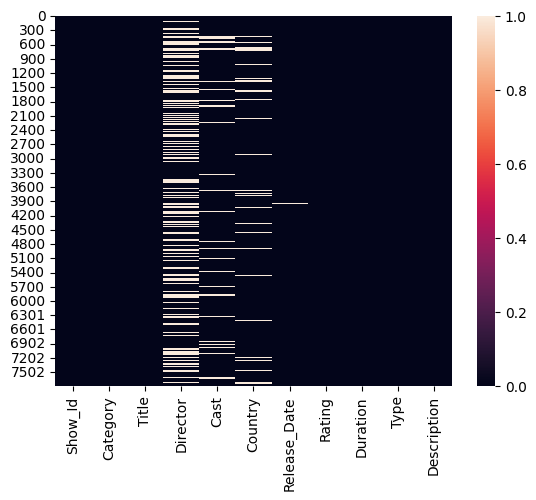

In [357]:
sns.heatmap(data.isnull())

### Question 1: For 'House of Cards', what is the Show Id and Who is the Director of the show?

In [358]:
data[data["Title"].isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### Question 2: In which year highest number of TV Shows & Movies were released? Show with Bar Graph.

In [359]:
# Function to get the year from the release date
def get_year(release_date):
    try:
        return release_date.split(',')[1].strip()
    except IndexError:
        return None
        
# Convert Release_Date to string type
data["Release_Date"] = data["Release_Date"].astype("str")

# Create a new column 'release_year'
data["Release_Year"] = data["Release_Date"].apply(lambda x: get_year(x))
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


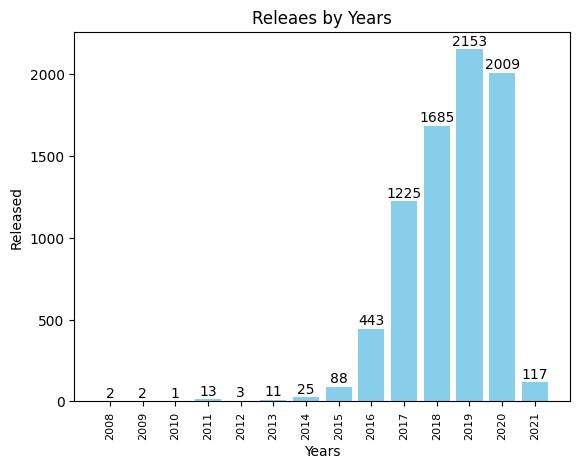

In [360]:
# Group the data by 'Release_Year' and count the number of shows for each year
num_releases = data.groupby("Release_Year")["Show_Id"].count()

# Extract unique years for the x-axis labels
# We use data.groupby("Release_Year") instead of data["Release_Year"].unique() 
# to ensure that the categories align correctly with their corresponding counts.
# This is important for accurate data visualization.
years = [year for year, df in data.groupby("Release_Year")]

# Plotting the bar chart
plt.title("Releaes by Years")
plt.bar(years, num_releases, color="skyblue")

# Annotating the bars with the number of releases
for x, y in enumerate(num_releases):
    plt.text(x, y + 25, str(y), ha="center")

# Customizing the axis labels
plt.xticks(years, rotation="vertical", size=8)

# Adding axis labels
plt.xlabel("Years")
plt.ylabel("Released")

# Display the plot
plt.show()

### Question 3: How many TV Shows & Movies are in this dataset? Show with Bar Graph.

In [361]:
data["Category"].unique()

array(['TV Show', 'Movie'], dtype=object)

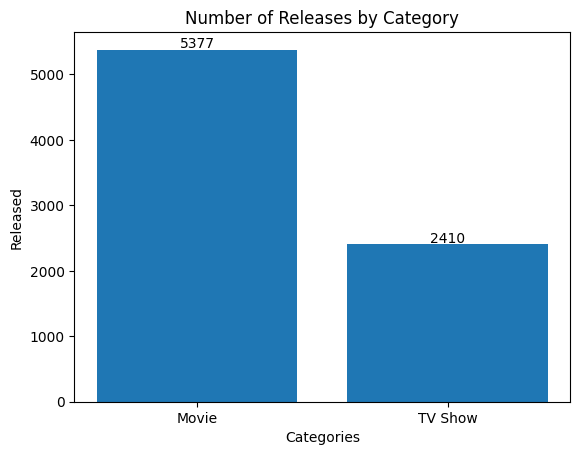

In [362]:
# Group the data by 'Category' and count the number of shows for each category
num_categories = data.groupby("Category")["Show_Id"].count()

# Extract unique years for the x-axis labels
categories = [category for category, df in data.groupby("Category")]

# Plotting the bar chart
plt.title("Number of Releases by Category")

# Annotating the bars with the number of releases
plt.bar(categories, num_categories)
for x, y in enumerate(num_categories):
    plt.text(x, y + 25, str(y), ha = "center")

# Adding axis labels
plt.xlabel("Categories")
plt.ylabel("Released")

# Display the plot
plt.show()

### Question 4: Show all the Movies that were released in year 2013.

In [363]:
data[(data["Category"] == "Movie") & (data["Release_Year"] == "2013")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,"November 1, 2013",NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",2013
649,s650,Movie,Aziz Ansari: Buried Alive,"Will Lovelace, Dylan Southern",Aziz Ansari,United States,"November 1, 2013",TV-MA,80 min,Stand-Up Comedy,"""Parks and Recreation"" star Aziz Ansari takes ...",2013
2948,s2949,Movie,Iliza Shlesinger: War Paint,Jay Chapman,Iliza Shlesinger,United States,"September 1, 2013",NR,75 min,Stand-Up Comedy,"""Last Comic Standing"" winner Iliza Shlesinger ...",2013
5315,s5315,Movie,Russell Peters: Notorious,Dave Higby,Russell Peters,United States,"October 14, 2013",NR,72 min,Stand-Up Comedy,Global comedy star Russell Peters leaves no et...,2013
5588,s5588,Movie,Shrek the Musical,Jason Moore,"Brian d'Arcy James, Daniel Breaker, Sutton Fos...",United States,"December 29, 2013",TV-G,130 min,"Children & Family Movies, Comedies, Music & Mu...",The greatest fairy tale never told comes to li...,2013
6866,s6865,Movie,The Short Game,Josh Greenbaum,"Sky Sudberry, Allan Kournikova, Jed Dy, Zamoku...",United States,"December 12, 2013",PG,100 min,"Children & Family Movies, Documentaries, Sport...","They are fiercely competitive athletes, determ...",2013


### Question 5: Show only the Titles of all TV Shows that were released in India only.

In [364]:
data[(data["Category"] == "TV Show") & (data["Country"] == "India")]["Title"]

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

### Question 6: Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix?

In [365]:
data["Director"].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

### Question 7: Show all the Records, where "Category is Movie and Type is Comedy" or "Country is United Kingdom"

In [366]:
data[(data["Type"] == "Comedies") & (data["Category"] == "Movie") | (data["Country"] == "United Kingdom")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017


### Question 8: In how many Movies/Shows, Tom Cruise was cast?

#### Preparing Data for Filtering

In [367]:
# Remove rows with NaN values in the 'Cast' column to enable string-based filtering.
# We create a new DataFrame 'new_data' to hold the filtered data.
# This is necessary because string operations like 'str.contains' don't work well with NaN values.
new_data = data.dropna(subset=["Cast"])

new_data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016


#### Filtering

In [368]:
new_data[new_data["Cast"].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019


### Question 9: What are the different Ratings defined by Netflix?

In [369]:
data["Rating"].nunique()

14

In [370]:
# Remove NaN values from the 'Rating' column and get unique values.
# Convert the resulting NumPy array to a Python list for better readability.
unique_ratings = list(data["Rating"].dropna().unique())
print("Unique Ratings:", unique_ratings)

Unique Ratings: ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']


#### Q.9.1. How many Movies got the "TV-14" rating, in Canada?

In [371]:
data[(data["Category"] == "Movie") & (data["Rating"] == "TV-14") & (data["Country"] == "Canada")]["Show_Id"].count()

11

#### Q.9.2. How many Tv Shows got "R" rating, after year 2018

In [372]:
# Convert the 'Release_Year' column to numeric data type.
# This is necessary for numerical comparisons in the subsequent filtering.
data["Release_Year"] = pd.to_numeric(data["Release_Year"])
data[(data["Category"] == "TV Show") & (data["Rating"] == "R") & (data["Release_Year"] > 2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0


### Question 10: What is the maximum duration of Movie/Show in Netflix?

In [373]:
# Split the 'Duration' column into two new columns: 'Minute' and 'Unit'.
data[["Minute", "Unit"]] = data["Duration"].str.split(' ', expand = True)

data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Minute,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min


In [374]:
# Convert the 'Minute' column to a numeric data type.
data["Minute"] = pd.to_numeric(data["Minute"])

# Find the maximum duration in minutes where the unit is "min".
data[(data["Unit"] == "min")]["Minute"].max()

312

### Question 11: Which individual country has the Highest Number of Tv Shows?

In [375]:
# Filter data to only include TV Shows.
data_tvshow = data[data["Category"] == "TV Show"]

# Find the country with the most number of TV Shows.
data_tvshow["Country"].value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

### Question 12: Sort the dataset by year

In [376]:
data.sort_values(by='Release_Year', ascending=False).head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year,Minute,Unit
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021.0,128,min
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021.0,86,min
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021.0,1,Season
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"January 10, 2021",PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021.0,162,min
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,"January 12, 2021",TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021.0,81,min
